<a href="https://colab.research.google.com/github/fahad-roshan/DS_FINAL_PROJECT/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
# load the dataset

path = '/content/Womens Clothing E-Commerce Reviews.csv'
clothing_data = pd.read_csv(path)
clothing_data.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
pip install pandas autocorrect contractions nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 14.9 MB/s eta 0:00:00
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=91900111cb0f75a35361904c17e26a1dc24bd698441e8f961026045e05738d75
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [5]:

clothing_data.dropna(inplace = True)
print(clothing_data.shape)

(19662, 11)


In [6]:
clothing_data = clothing_data[["Review Text", "Recommended IND"]]

In [7]:
from autocorrect import Speller
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure necessary NLTK data is downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define stopwords
stop_words = set(stopwords.words('english'))


# Initialize spell checker and lemmatizer
spell = Speller(fast=True)
lemmatizer = WordNetLemmatizer()


# Apply the cleaning steps directly on the DataFrame
clothing_data['Cleaned Review Text'] = clothing_data['Review Text'].apply(lambda x: " ".join(
    [lemmatizer.lemmatize(word) for word in [word for word in word_tokenize(
        contractions.fix(spell(x)).lower()) if word.isalpha()] if word not in stop_words]))



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
positive_reviews = clothing_data[clothing_data["Recommended IND"] == 1]["Review Text"]
positive_reviews

3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
6        I aded this in my basket at hte last mintue to...
7        I ordered this in carbon for store pick up, an...
8        I love this dress. i usually get an xs but it ...
                               ...                        
23479    So i wasn't sure about ordering this skirt bec...
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 16087, dtype: object

In [9]:
negative_reviews = clothing_data[clothing_data["Recommended IND"] == 0]["Review Text"]
negative_reviews

2        I had such high hopes for this dress and reall...
5        I love tracy reese dresses, but this one is no...
10       Dress runs small esp where the zipper area run...
22       First of all, this is not pullover styling. th...
25       Loved the material, but i didnt really look at...
                               ...                        
23447    I really wanted to like this dress and was enc...
23449    I tried these on because the color is really p...
23460    I purchased this for a very good price and i t...
23478    I was surprised at the positive reviews for th...
23483    This fit well, but the top was very see throug...
Name: Review Text, Length: 3575, dtype: object

In [10]:
positive_words = " ".join(positive_reviews)
positive_words[:1000]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments! This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!! I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops. I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice

In [11]:
negative_words = " ".join(negative_reviews)
negative_words[:1000]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress. Dress run

In [12]:
from wordcloud import WordCloud
wordcloud_positive = WordCloud(background_color = "white", max_words = 250, colormap = "inferno")
wordcloud_positive.generate(positive_words)

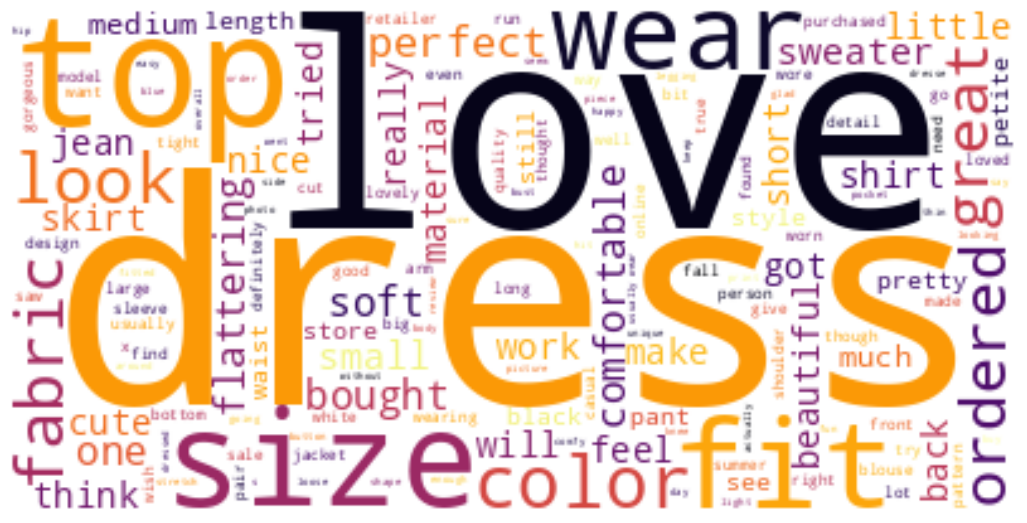

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

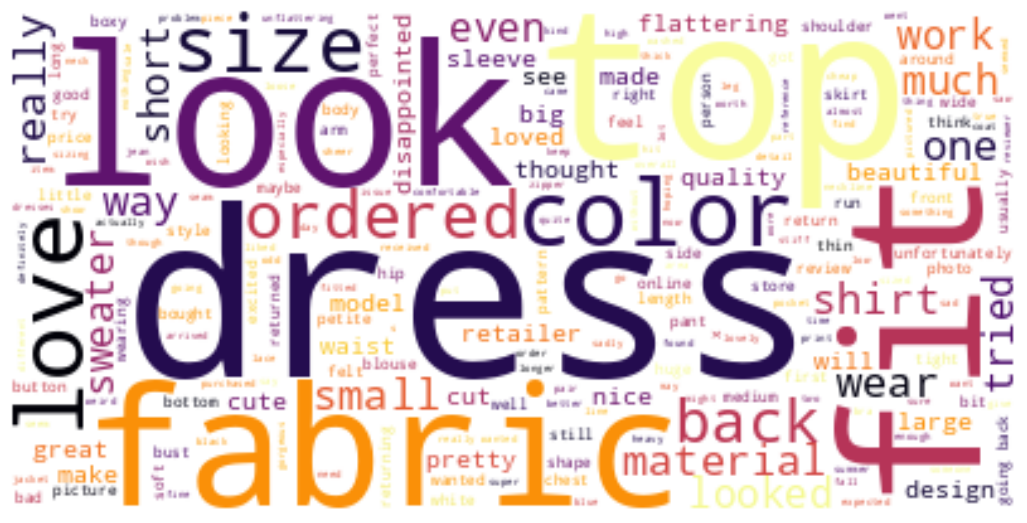

In [14]:
wordcloud_negative = WordCloud(background_color = "white", max_words = 250, colormap = "inferno")
wordcloud_negative.generate(negative_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud_negative, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [27]:

"""clothing_data = clothing_data[clothing_data['Rating'] != 3]  # Remove neutral reviews"""
clothing_data['sentiment'] = clothing_data['Recommended IND'].apply(lambda x: 1 if x == 1 else 0)  # 1 for positive, 0 for negative


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clothing_data['Cleaned Review Text'])
y = clothing_data['sentiment']


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Model training
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)



[1 1 0 ... 1 1 1]


In [46]:
print(report)

              precision    recall  f1-score   support

           0       0.75      0.61      0.67       700
           1       0.92      0.96      0.94      3233

    accuracy                           0.89      3933
   macro avg       0.83      0.78      0.80      3933
weighted avg       0.89      0.89      0.89      3933

